<IPython.core.display.Javascript object>

My son is partially vaxed and we submitted a religious exemption without any question from the district.
{'dep_parse': 'poss(son-2, My-1)\nnsubj(vaxed-5, son-2)\ncop(vaxed-5, is-3)\nadvmod(vaxed-5, partially-4)\nroot(ROOT-0, vaxed-5)\nnsubj(submitted-8, we-7)\nconj_and(vaxed-5, submitted-8)\ndet(exemption-11, a-9)\namod(exemption-11, religious-10)\ndobj(submitted-8, exemption-11)\ndet(question-14, any-13)\nprep_without(submitted-8, question-14)\ndet(district-17, the-16)\nprep_from(question-14, district-17)', 'chunk': [('My', 'B-NP'), ('son', 'E-NP'), ('is', 'S-VP'), ('partially', 'B-ADJP'), ('vaxed', 'E-ADJP'), ('and', 'O'), ('we', 'S-NP'), ('submitted', 'S-VP'), ('a', 'B-NP'), ('religious', 'I-NP'), ('exemption', 'E-NP'), ('without', 'S-PP'), ('any', 'B-NP'), ('question', 'E-NP'), ('from', 'S-PP'), ('the', 'B-NP'), ('district', 'E-NP'), ('.', 'O')], 'pos': [('My', 'PRP$'), ('son', 'NN'), ('is', 'VBZ'), ('partially', 'RB'), ('vaxed', 'JJ'), ('and', 'CC'), ('we', 'PRP'), ('submitted', '

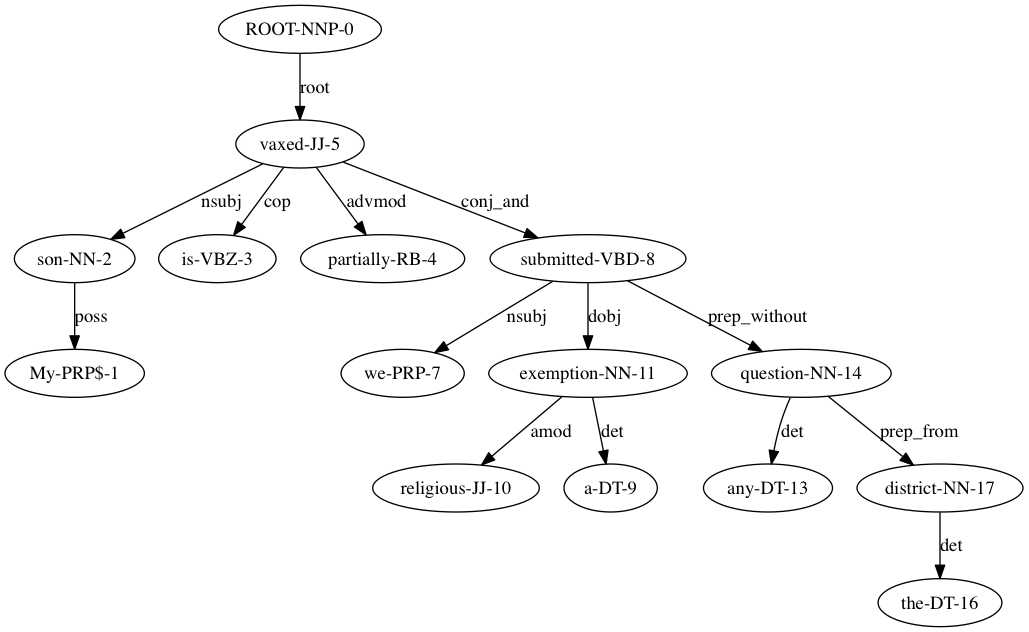

[{'arg1_with_pos': 'we-PRP-7', 'arg1': '{we}', 'arg2': 'a religious {exemption}', 'rel_with_pos': 'submitted-VBD-8', 'rel': '{submitted}', 'pattern': '(nsubj, verb, dobj)', 'arg2_with_pos': 'a-DT-9 religious-JJ-10 exemption-NN-11', 'type': 'SVO'}]
simplified
[{'rel': u'{submitted}', 'arg1': u'{we}', 'arg2': u'a religious {exemption}', 'rel_with_pos': 'submitted-VBD-8', 'arg1_with_pos': 'we-PRP-7', 'pattern': '(nsubj, verb, dobj)', 'arg2_with_pos': 'a-DT-9 religious-JJ-10 exemption-NN-11', 'type': 'SVO'}]


In [9]:
import time # to calculate the run time
import re # regular expression
import networkx as nx # to calculate the shortest path between nodes in the parsing tree
from practnlptools.tools import Annotator # to extract dep_parse, syntatic_parse, srl, verbs, words, POS, NER, chunks
import pandas as pd
from datetime import datetime, timedelta
import csv
import matplotlib.pyplot as plt
from collections import defaultdict
from pprint import pprint # print dictionaries nicer
from nxpd import draw # show in iptyhon
from IPython.display import display # to display images and draw objects 
from networkx.drawing.nx_agraph import write_dot
import sys
from nltk.tokenize import sent_tokenize
from nltk.stem import SnowballStemmer
import numpy as np
from collections import defaultdict

%matplotlib inline

#import the other functions
%run -i 'main_functions'
%run -i 'utility_functions'
%run -i 'parameters'

#t_orig = "Fortunately MN does not have a complicated exemption process when you do need one : If a notarized statement signed by the minor child 's parent or by the emancipated person is submitted to the person having supervision of the school or child care facility stating that the person has not been immunized as prescribed because of the conscientiously held beliefs of the parent of the minor child or of the emancipated person , the immunizations specified in the statement shall not be required ."
from nltk.tokenize import sent_tokenize
from practnlptools.tools import Annotator
annotator = Annotator()
t_orig = "My son is partially vaxed and we submitted a religious exemption without any question from the district."# and we just submitted a religious exemption to the school she will be attending this fall ."#"The principal opposition parties boycotted the polls after accusations of vote-rigging , and the only other name on the ballot was a little-known challenger from a marginal political party."
t_orig = t_orig.replace("-"," ")
t_sentences = sent_tokenize(t_orig)
for t in t_sentences:
    print t
    t_annotated = annotator.getAnnotations(t, dep_parse=True)
    print t_annotated
    dep = t_annotated['dep_parse']
    g_dir = create_dep_graph(t_annotated)
    if g_dir is None:
        print "No extraction found"
        continue
    #if SHOW_DP_PLOTS:
    plot_dep(g_dir,t)
    g_undir = g_dir.to_undirected()
    rels_pure, rels_simp = get_relations(g_dir, t_annotated, option="SVO")
    print rels_pure
    print "simplified"
    print rels_simp